# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [3]:
wine_df = pd.read_csv('winequality-red.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [4]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Q4 Print the descriptive statistics of each & every column using describe() function

In [7]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

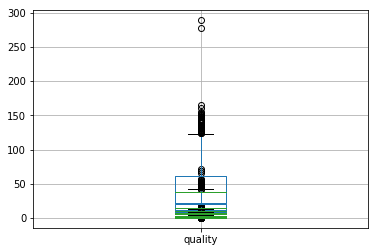

In [8]:
cols = wine_df.columns
for i in cols:
   wine_df.boxplot(column=[i])

#wine_df.boxplot(['fixed acidity'])
#wine_df.boxplot(['volatile acidity'])
#wine_df.boxplot(['citric acid'])
#wine_df.boxplot(['chlorides'])
#wine_df.boxplot(['free sulfur dioxide'])
#wine_df.boxplot(['total sulfur dioxide'])
#wine_df.boxplot(['density'])
#wine_df.boxplot(['pH'])
#wine_df.boxplot(['sulphates'])
#wine_df.boxplot(['alcohol'])
#wine_df.boxplot(['quality'])


In [9]:
#by observing the mean and 25% data in the above stats it shows the data lies in the tails, for example fixed acidity, volatile acidity
# there are few fetaures whose mean and median are almost same for example chlorides and alcohol

In [10]:
#the above box plot shows here are outliers hence removing those
q1 = wine_df.quantile(0.25)
q3 = wine_df.quantile(0.75)
iqr=q3-q1
cap1 = q1-1.5*iqr
cap2 = q3+1.5*iqr
wine_df = wine_df[(wine_df>=cap1) & (wine_df<=cap2)]
wine_df = wine_df.dropna(axis=0)
    
print(wine_df.shape)

(1179, 12)


# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


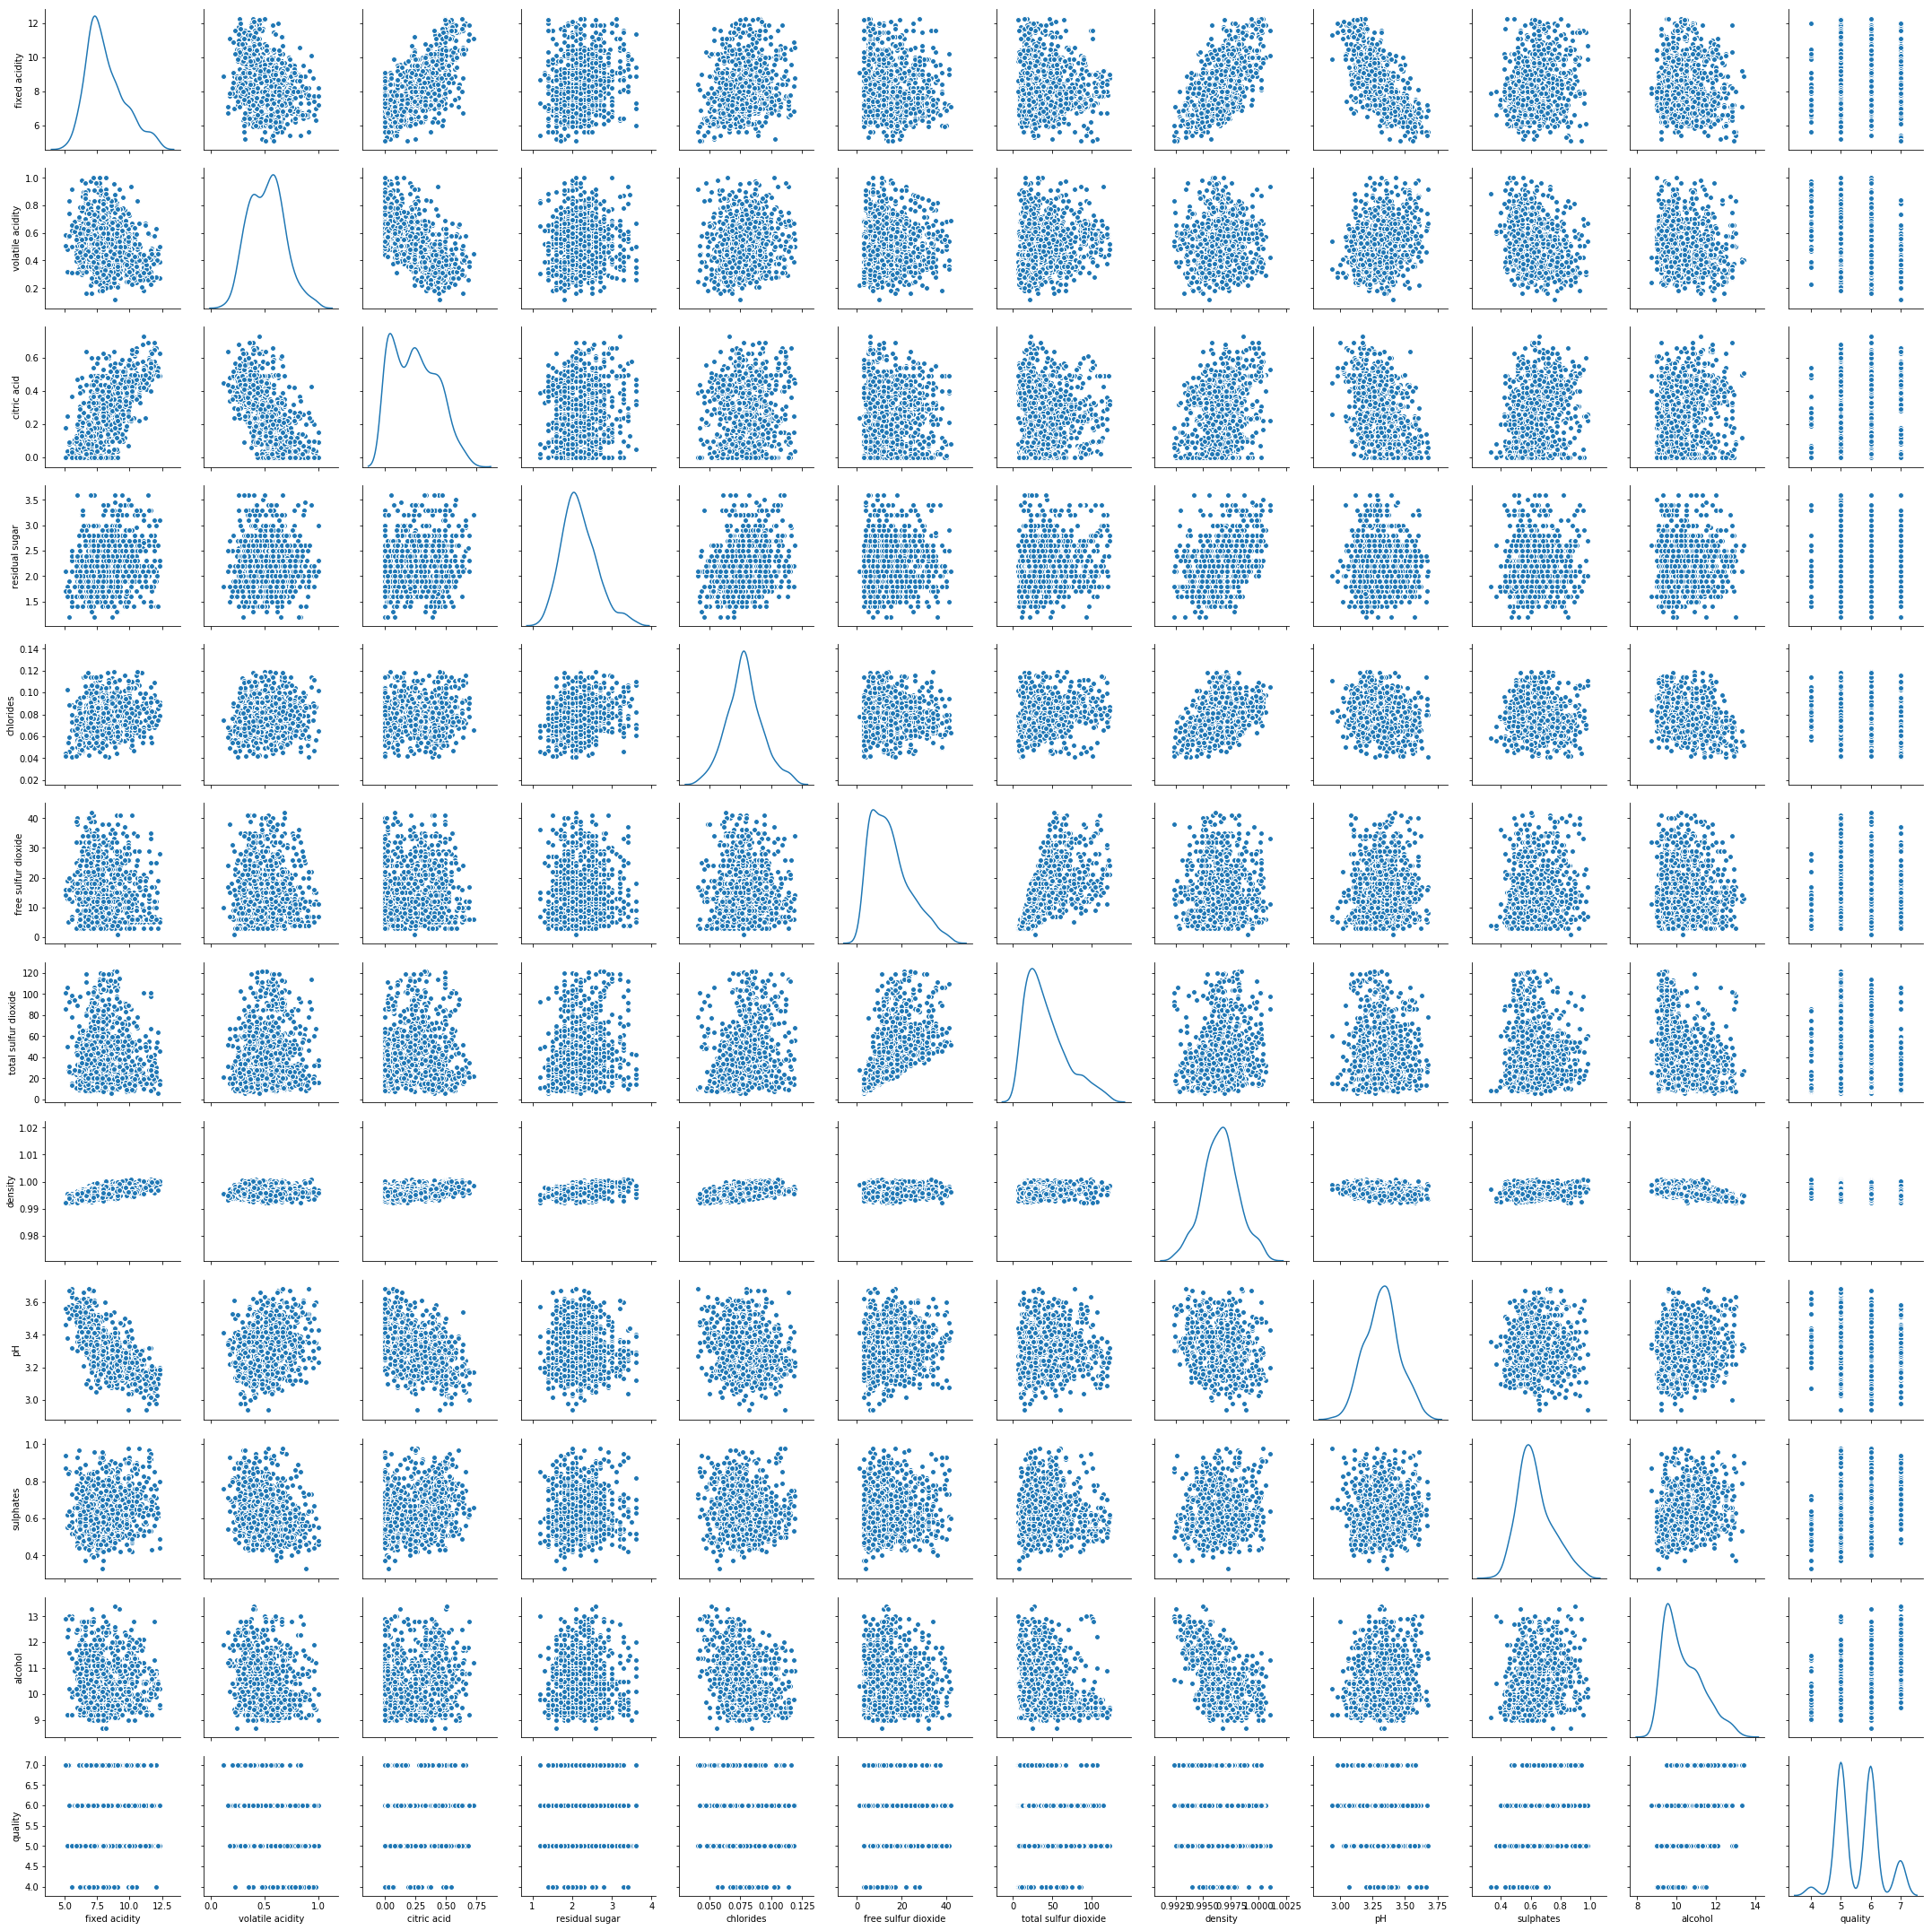

In [11]:
import seaborn as sns
sns.pairplot(wine_df , diag_kind = "kde")

In [12]:
data1 = wine_df.corr(method = "pearson")
data1.iloc[:,0:1]

,fixed acidity
fixed acidity,1.000000
volatile acidity,-0.271010
citric acid,0.659397
residual sugar,0.229653
chlorides,0.197774
free sulfur dioxide,-0.150845
total sulfur dioxide,-0.087083
density,0.610125
pH,-0.684378
sulphates,0.165367


In [13]:
wine_df['quality'].value_counts()

5.0    513
6.0    498
7.0    135
4.0     33
Name: quality, dtype: int64

In [14]:
#model can predict the quality value 5,6, very well than other value

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [15]:
#here the dependent variable is cultivator and rest all are  independent
from sklearn.model_selection import train_test_split

#X =  wine_df.drop("quality", axis=1)
#y =  wine_df.pop("quality")
y=wine_df[['quality']]
X=wine_df.drop(['quality'],axis=1)

In [16]:
print(X.shape)
print(y.shape)

(1179, 11)
(1179, 1)


In [17]:
print(wine_df.shape)

(1179, 12)


In [18]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [20]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy",random_state = 10) 
  
    # Performing training 
clf_entropy.fit(train_set, train_labels) 
print("clf_entropy..",clf_entropy)

clf_entropy.. DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


In [21]:
y_pred = clf_entropy.predict(test_set) 
print("Predicted values:") 
print(y_pred)

Predicted values:
[5. 6. 6. 5. 5. 7. 7. 6. 6. 5. 6. 5. 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 5. 6.
 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 5. 5. 5. 5. 6. 5.
 6. 5. 6. 5. 5. 5. 6. 5. 5. 5. 5. 7. 5. 5. 5. 5. 5. 6. 7. 6. 5. 5. 5. 5.
 5. 5. 6. 5. 5. 7. 5. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 7. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 6. 6. 7. 7. 5. 5. 6. 5. 5. 5. 5. 5. 7. 5.
 6. 5. 6. 6. 5. 4. 5. 5. 6. 5. 5. 4. 5. 6. 5. 6. 6. 5. 6. 6. 7. 5. 6. 6.
 5. 5. 6. 6. 7. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5. 6. 7. 5. 5. 6. 5. 5. 5. 5.
 6. 6. 5. 6. 6. 6. 5. 7. 6. 7. 6. 6. 5. 6. 6. 7. 6. 5. 7. 6. 6. 6. 5. 5.
 5. 4. 5. 6. 7. 6. 5. 5. 6. 6. 6. 7. 6. 5. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5.
 6. 6. 6. 7. 6. 5. 5. 6. 7. 6. 6. 6. 6. 7. 5. 5. 7. 6. 6. 6. 6. 5. 5. 6.
 6. 7. 5. 5. 7. 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5. 5.
 5. 6. 6. 6. 7. 6. 6. 5. 6. 5. 6. 5. 5. 4. 6. 7. 6. 6. 7. 6. 7. 5. 6. 7.
 5. 6. 6. 6. 5. 6. 5. 5. 6. 5. 4. 6. 5. 4. 5. 6. 6. 6. 7. 6. 6. 6. 5. 6.
 6. 6. 5. 5. 6. 6. 6. 6. 5. 6. 6.

# Q9 Print the accuracy of the model & print the confusion matrix 

In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [23]:
print("Confusion Matrix: ", 
        confusion_matrix(test_labels,y_pred)) 
      
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100) 
      
print("Report : ", 
   classification_report(test_labels, y_pred)) 

Confusion Matrix:  [[  1   5   3   0]
 [  4 105  42   3]
 [  0  36 104  14]
 [  1  10   9  17]]
Accuracy :  64.12429378531074
Report :               precision    recall  f1-score   support

        4.0       0.17      0.11      0.13         9
        5.0       0.67      0.68      0.68       154
        6.0       0.66      0.68      0.67       154
        7.0       0.50      0.46      0.48        37

avg / total       0.64      0.64      0.64       354



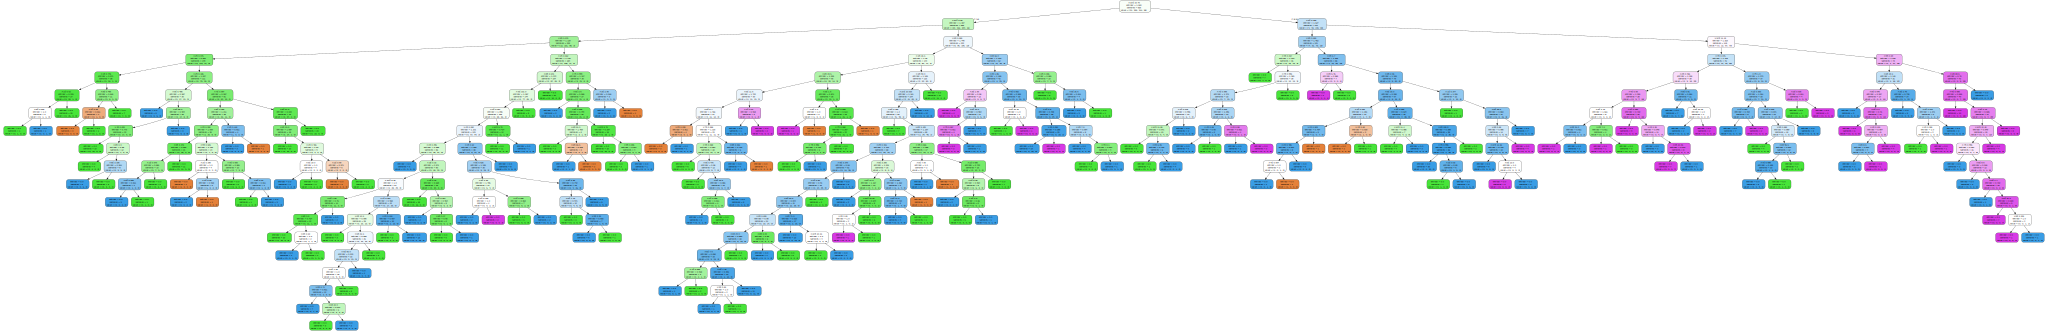

In [24]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf_entropy, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

clf_entropy.. DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
Predicted values:
[5. 5. 6. 5. 5. 6. 7. 5. 7. 5. 7. 5. 6. 5. 6. 5. 5. 7. 5. 5. 5. 5. 5. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 5. 7. 5. 5. 5. 7. 7. 5. 5. 5. 6. 5. 5. 5. 5. 5.
 6. 5. 5. 6. 5. 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 5.
 5. 5. 6. 5. 5. 6. 5. 5. 5. 5. 6. 6. 5. 6. 5. 5. 5. 5. 5. 5. 7. 5. 6. 5.
 5. 5. 6. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 6. 5. 5. 7. 5. 5. 5. 5. 5. 7. 5.
 6. 5. 5. 7. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 7. 5. 6. 5.
 6. 5. 5. 5. 7. 5. 5. 5. 5. 5. 6. 5. 6. 5. 6. 5. 7. 5. 5. 6. 5. 5. 5. 5.
 6. 5. 6. 5. 6. 6. 5. 7. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 7. 6. 5. 5. 5.
 5. 5. 5. 5. 7. 5. 5. 5. 6. 5. 5. 6

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


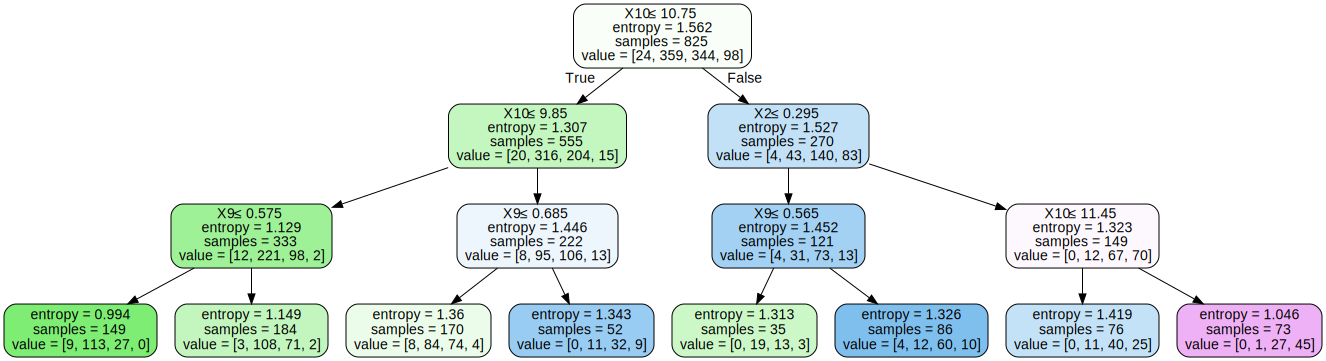

In [25]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3) 
  
    # Performing training 
clf_entropy.fit(train_set, train_labels) 
print("clf_entropy..",clf_entropy)
y_pred = clf_entropy.predict(test_set) 
print("Predicted values:") 
print(y_pred)
print("Confusion Matrix: ", 
        confusion_matrix(test_labels,y_pred)) 
      
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100) 
      
print("Report : ", 
   classification_report(test_labels, y_pred)) 
dot_data = tree.export_graphviz(clf_entropy, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [27]:
#X, y = make_classification(n_samples=500, n_features=4,
 #                          n_informative=2, n_redundant=0,
  #                        random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_set, train_labels)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
print(clf.feature_importances_)

[0.07567854 0.10053904 0.07394721 0.06002891 0.08627314 0.06697575
 0.09053871 0.10334873 0.07559111 0.11898207 0.14809678]


In [29]:
y_pred = clf.predict(test_set) 
print("Predicted values:") 
print(y_pred)

Predicted values:
[5. 6. 6. 5. 5. 7. 7. 6. 6. 5. 7. 5. 7. 6. 6. 6. 5. 6. 5. 5. 6. 5. 5. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5. 7. 5. 6. 5. 5. 5. 5. 7. 6. 5. 5. 5. 5.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 7. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 6. 7. 7. 5. 5. 6. 5. 5. 5. 5. 5. 7. 5.
 6. 6. 5. 6. 5. 5. 5. 6. 5. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 7. 7. 5. 6. 5.
 6. 5. 5. 5. 7. 5. 6. 6. 5. 6. 6. 5. 6. 6. 5. 5. 7. 5. 5. 6. 6. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 7. 6. 7. 6. 5. 5. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 5.
 5. 5. 5. 6. 7. 5. 5. 5. 6. 6. 6. 7. 5. 5. 5. 6. 6. 5. 5. 6. 5. 5. 6. 5.
 7. 6. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7. 5. 5. 6. 5. 6. 5. 6. 5. 5. 6.
 5. 7. 5. 6. 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6.
 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6.
 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 5. 6. 6. 6. 5. 5. 6.
 6. 6. 5. 5. 6. 6. 6. 6. 5. 6. 6.

In [30]:
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100) 

Accuracy :  71.46892655367232


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [32]:
model_adaboost = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(model_adaboost, X, y, cv=5)
scores.mean() 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.4429406037000974

In [33]:
model_adaboost.fit(train_set, train_labels)
y_pred =model_adaboost.predict(test_set) 
print("Predicted values:") 
print(y_pred)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values:
[5. 5. 7. 5. 6. 7. 7. 5. 6. 5. 7. 6. 7. 5. 7. 7. 5. 7. 6. 4. 6. 5. 5. 7.
 4. 5. 5. 5. 7. 7. 5. 7. 6. 7. 6. 6. 6. 7. 7. 6. 5. 5. 6. 5. 5. 5. 5. 5.
 6. 6. 5. 6. 5. 7. 6. 4. 6. 7. 6. 6. 5. 6. 5. 5. 4. 5. 7. 5. 5. 5. 5. 6.
 5. 6. 5. 5. 5. 7. 5. 6. 5. 6. 7. 5. 4. 7. 5. 5. 6. 6. 5. 6. 7. 6. 7. 6.
 7. 5. 6. 6. 5. 6. 6. 5. 5. 5. 5. 6. 7. 6. 6. 5. 6. 5. 5. 6. 6. 7. 7. 5.
 6. 6. 6. 7. 5. 4. 5. 7. 6. 7. 5. 5. 6. 6. 5. 5. 5. 5. 5. 7. 7. 5. 7. 5.
 7. 5. 6. 5. 7. 4. 5. 5. 5. 5. 6. 5. 5. 6. 6. 5. 7. 7. 5. 7. 5. 5. 5. 5.
 6. 6. 7. 5. 6. 5. 5. 7. 6. 7. 7. 6. 6. 6. 5. 7. 7. 6. 5. 7. 6. 6. 6. 6.
 5. 5. 5. 5. 7. 6. 5. 5. 7. 5. 5. 7. 5. 5. 6. 7. 6. 5. 5. 7. 5. 5. 5. 6.
 7. 7. 7. 7. 6. 7. 5. 7. 7. 6. 6. 6. 6. 7. 6. 5. 7. 6. 7. 5. 7. 5. 5. 7.
 4. 7. 5. 7. 7. 7. 6. 5. 5. 5. 7. 5. 5. 7. 6. 6. 5. 7. 5. 7. 5. 5. 5. 6.
 7. 5. 7. 7. 7. 6. 6. 5. 7. 5. 6. 5. 6. 5. 7. 6. 7. 7. 7. 7. 6. 6. 5. 7.
 6. 4. 6. 6. 5. 5. 5. 5. 5. 5. 5. 7. 5. 5. 6. 6. 6. 6. 7. 6. 7. 5. 5. 6.
 7. 5. 5. 5. 5. 7. 7. 6. 5. 6. 6.

In [34]:
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100)

Accuracy :  49.152542372881356


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [35]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.5885701868752716


In [37]:
model.fit(train_set, train_labels)
y_pred =model.predict(test_set) 
print("Predicted values:") 
print(y_pred)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values:
[5. 6. 6. 5. 5. 7. 7. 6. 6. 5. 7. 5. 7. 6. 6. 6. 5. 7. 5. 5. 6. 6. 6. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 7. 6. 5. 5. 6. 5. 5. 5. 5. 5.
 6. 6. 5. 5. 6. 5. 6. 5. 6. 6. 5. 7. 5. 6. 5. 5. 5. 5. 7. 6. 5. 5. 5. 5.
 5. 5. 6. 5. 5. 7. 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 6. 7. 6. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 6. 7. 7. 5. 5. 7. 5. 5. 5. 5. 5. 7. 5.
 6. 6. 5. 6. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 6. 5. 6. 5. 6. 7. 7. 5. 6. 5.
 6. 5. 5. 5. 7. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5. 5. 7. 5. 5. 6. 6. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 7. 6. 7. 6. 5. 5. 6. 5. 6. 6. 6. 5. 6. 6. 5. 6. 5.
 5. 5. 5. 6. 7. 5. 5. 5. 6. 6. 6. 7. 5. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6.
 7. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 5. 5. 6. 6. 5. 5. 6. 5. 5. 6.
 5. 7. 5. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6.
 5. 5. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 5. 6. 6. 7. 6. 6. 6. 6. 5. 5. 5. 6.
 6. 6. 6. 5. 6. 5. 5. 5. 6. 5. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6. 7. 5. 5. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5.

In [38]:
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100)

Accuracy :  70.62146892655367


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [39]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model_gradient = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_gradient, X, y, cv=kfold)
print(results.mean())

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.5614298131247283


In [41]:
model_gradient.fit(train_set, train_labels)
y_pred =model_gradient.predict(test_set) 
print("Predicted values:") 
print(y_pred)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values:
[5. 6. 6. 5. 6. 7. 7. 6. 6. 5. 7. 5. 7. 6. 6. 6. 5. 7. 5. 5. 6. 5. 5. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 5. 7. 6. 5. 5. 6. 7. 6. 5. 5. 6. 6. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 5. 7. 5. 6. 6. 5. 5. 6. 7. 6. 5. 5. 5. 6.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 5. 5. 6. 5. 6. 7. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 7. 6. 5. 5. 6. 5. 5. 5. 6. 5. 7. 5.
 6. 6. 4. 6. 5. 4. 5. 6. 5. 6. 5. 5. 5. 6. 5. 5. 6. 5. 5. 7. 7. 5. 6. 5.
 6. 5. 5. 5. 7. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5. 5. 7. 5. 5. 6. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 5. 7. 6. 7. 6. 5. 5. 6. 5. 7. 6. 6. 5. 6. 6. 6. 6. 5.
 5. 5. 5. 6. 7. 6. 5. 5. 6. 6. 6. 7. 6. 5. 5. 6. 6. 5. 5. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 6. 7. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6.
 5. 7. 5. 6. 7. 6. 6. 5. 5. 5. 7. 6. 5. 6. 7. 6. 6. 6. 6. 5. 5. 6. 5. 6.
 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6.
 6. 6. 6. 5. 5. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6.

In [42]:
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100)

Accuracy :  71.1864406779661


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
estimators = []
estimators.append(('decision_trees', clf_entropy))
estimators.append(('random_forest', clf))
estimators.append(('ada_boost', model_adaboost))
estimators.append(('gradient_boost', model_gradient))
estimators.append(('bagging', model))

In [45]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

0.6030131826741996


In [46]:
ensemble.fit(train_set, train_labels)
y_pred =ensemble.predict(test_set) 
print("Predicted values:") 
print(y_pred)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted values:
[5. 6. 6. 5. 5. 7. 7. 6. 6. 5. 7. 5. 7. 6. 6. 6. 5. 7. 5. 5. 6. 5. 5. 6.
 5. 5. 5. 5. 6. 6. 5. 6. 5. 7. 6. 6. 5. 6. 7. 6. 5. 5. 6. 5. 5. 5. 5. 5.
 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 5. 7. 5. 6. 5. 5. 5. 5. 7. 6. 5. 5. 5. 5.
 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 5. 6. 7. 5. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 6. 7. 6. 5. 5. 6. 5. 5. 5. 5. 5. 7. 5.
 6. 6. 5. 6. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 5. 5. 6. 5. 5. 7. 7. 5. 6. 5.
 6. 5. 5. 5. 7. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5. 5. 7. 5. 5. 6. 5. 5. 5. 5.
 6. 6. 6. 6. 6. 6. 5. 7. 6. 7. 6. 5. 5. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 5.
 5. 5. 5. 6. 7. 5. 5. 5. 6. 6. 6. 7. 5. 5. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5.
 7. 6. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 7. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6.
 5. 7. 5. 6. 7. 6. 6. 5. 5. 5. 7. 6. 5. 6. 5. 6. 6. 6. 6. 5. 5. 6. 5. 6.
 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6.
 6. 6. 6. 5. 5. 5. 5. 5. 6. 5. 5. 6. 5. 5. 5. 5. 6. 5. 6. 6. 7. 5. 5. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5.

In [47]:
print ("Accuracy : ", 
    accuracy_score(test_labels,y_pred)*100)

Accuracy :  71.46892655367232
